In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from floorplans.lidar.lidar import Lidar2D, OnlineTrajectoryLidarDataset
import glob
import numpy as np

In [2]:
# Settings
data_dir = "./32_data"
waypoint_subdir = "tight_paths"
img_path = os.path.join(data_dir, "floor_img.png")
num_beams = 20
beam_samps = 25
beam_length = 0.2
spline_res = 30
samp_distribution_factor = 1.0
collision_samps = 50
fine_samps = 3
num_scans_in_window = 30
spline_res = 30

# Setup Lidar Object
lidar = Lidar2D(img_path, num_beams, beam_length, beam_samps,
    samp_distribution_factor, collision_samps, fine_samps, border_width=30)

# Waypoint Settings
wp_names = glob.glob1(os.path.join(data_dir, waypoint_subdir), "*.npy") 

datasets = []
for wp_name in wp_names:
    wp_path = os.path.join(data_dir, waypoint_subdir, wp_name)
    wps = np.load(wp_path)
    ds = OnlineTrajectoryLidarDataset(lidar, wps, 
        spline_res, num_scans_in_window)
    datasets.append(ds)

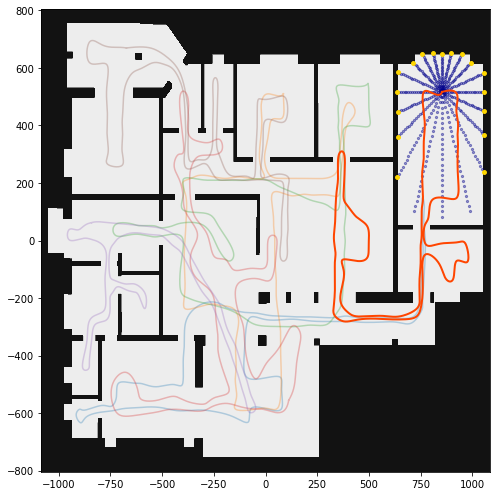

In [3]:
(fig, ax) = plt.subplots(figsize=(7,7), tight_layout=True)
X, Y = np.meshgrid(lidar.xs, lidar.ys)
ax.contourf(X, Y, lidar.img, cmap=cm.binary, zorder=0)

ax.plot(datasets[0].scan_locs[:, 0], datasets[0].scan_locs[:, 1],
    c="orangered", linewidth=2, zorder=3)
scan_points = datasets[0].scans[:datasets[0].scan_size, :]
ld_points = scan_points[scan_points[:, 2] != 1.0]
hd_points = scan_points[scan_points[:, 2] == 1.0]
ax.scatter(ld_points[:, 0], ld_points[:, 1], s=5, color="darkblue", alpha=0.4, zorder=2)
ax.scatter(hd_points[:, 0], hd_points[:, 1], s=15, color="gold", alpha=1.0, zorder=2)
for ds in datasets[1:]:
    ax.plot(ds.scan_locs[:, 0], ds.scan_locs[:, 1], alpha=0.3, zorder=1)

In [4]:
fig.savefig("lidar_paperfig.svg")